In [29]:
import numpy as np
import pandas as pd

data=pd.read_csv('har_activity1.csv')
print(data.head())
print(data.info())

     user gender  age  how_tall_in_meters  weight  body_mass_index  x1   y1  \
0  debora  Woman   46                1.62      75             28.6   0   97   
1  debora  Woman   46                1.62      75             28.6   1  100   
2  debora  Woman   46                1.62      75             28.6  -2  102   
3  debora  Woman   46                1.62      75             28.6   0  102   
4  debora  Woman   46                1.62      75             28.6  -3   97   

   z1  x2  y2  z2  x3   y3  z3   x4     y4   z4    class  
0 -61 -14  19 -16 -13  105 -89 -148 -102.0 -146  sitting  
1 -63 -10  22 -13 -14  104 -91 -177  -99.0 -133  sitting  
2 -73 -13  19 -17 -13  104 -90 -158  -99.0 -150  sitting  
3 -67 -10  21 -13 -13  104 -91 -156 -101.0 -147  sitting  
4 -66 -15  18 -17 -13  104 -90 -157  -99.0 -148  sitting  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 19 columns):
user                  9998 non-null object
gender               

In [30]:
from sklearn import preprocessing 
# encode class values as integers
le = preprocessing.LabelEncoder() #create an encoder instance
le.fit(data['class'].unique())             #fit the encoder with two string "no" and "yes"
data['class']=le.transform(data['class'])    #to transform df['driveway'] value of yes and no to 1 and 0
data=data.dropna(axis='rows')
print(data.head())

     user gender  age  how_tall_in_meters  weight  body_mass_index  x1   y1  \
0  debora  Woman   46                1.62      75             28.6   0   97   
1  debora  Woman   46                1.62      75             28.6   1  100   
2  debora  Woman   46                1.62      75             28.6  -2  102   
3  debora  Woman   46                1.62      75             28.6   0  102   
4  debora  Woman   46                1.62      75             28.6  -3   97   

   z1  x2  y2  z2  x3   y3  z3   x4     y4   z4  class  
0 -61 -14  19 -16 -13  105 -89 -148 -102.0 -146      0  
1 -63 -10  22 -13 -14  104 -91 -177  -99.0 -133      0  
2 -73 -13  19 -17 -13  104 -90 -158  -99.0 -150      0  
3 -67 -10  21 -13 -13  104 -91 -156 -101.0 -147      0  
4 -66 -15  18 -17 -13  104 -90 -157  -99.0 -148      0  


In [31]:
le2 = preprocessing.LabelEncoder() #create an encoder instance
le2.fit(data['gender'].unique())             #fit the encoder with two string "no" and "yes"
data['gender']=le2.transform(data['gender'])    #to transform df['driveway'] value of yes and no to 1 and 0
print(data.head())

     user  gender  age  how_tall_in_meters  weight  body_mass_index  x1   y1  \
0  debora       1   46                1.62      75             28.6   0   97   
1  debora       1   46                1.62      75             28.6   1  100   
2  debora       1   46                1.62      75             28.6  -2  102   
3  debora       1   46                1.62      75             28.6   0  102   
4  debora       1   46                1.62      75             28.6  -3   97   

   z1  x2  y2  z2  x3   y3  z3   x4     y4   z4  class  
0 -61 -14  19 -16 -13  105 -89 -148 -102.0 -146      0  
1 -63 -10  22 -13 -14  104 -91 -177  -99.0 -133      0  
2 -73 -13  19 -17 -13  104 -90 -158  -99.0 -150      0  
3 -67 -10  21 -13 -13  104 -91 -156 -101.0 -147      0  
4 -66 -15  18 -17 -13  104 -90 -157  -99.0 -148      0  


In [46]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#classifier=SGDClassifier(max_iter=1000)
clf = LinearSVC(random_state=42, tol=1e-3)
#prepare data which is step 3
Y = data['class']  #price is the target, Y
X = np.array([data['body_mass_index'],data['x1'],data['y1'],data['z1'],data['x2'],data['y2'],data['z2'],data['x3'],data['y3'],data['z3'],data['x4'],data['y4'],data['z4']])  # X
X=X.T
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=43,test_size=0.2)
classifier.fit(xtrain,ytrain)
y_pred=classifier.predict(xtest)
print(accuracy_score(ytest,y_pred))  #percentage of classification on the test data is correct

0.789


Text(91.68,0.5,'true value')

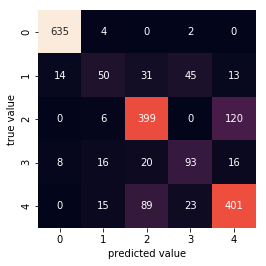

In [47]:
from sklearn.metrics import confusion_matrix
import  seaborn as sns

mat2=confusion_matrix(ytest,y_pred)
sns.heatmap(mat2,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')